In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [64]:
#declaring norm function with the 2d array dataset
def norm(dataset):
    #looping though each column index except the last column
    for column_index in range(dataset.shape[1] - 1):
        
        #find min and max values for the next step
        max_val = dataset[column_index].max()
        min_val = dataset[column_index].min()

        #normalizing the column to fall within the range [0,1]
        #modify the dataset in place. original values replaced by the normalized values
        dataset.iloc[:, column_index] = (dataset.iloc[:, column_index] - min_val) / (max_val - min_val)

In [65]:
def test(training, testing, w):    
    #testing
    #truth table vars
    true_positive = false_positive = true_negative = false_negative = 0
    
    # Iterating through the testing dataset to evaluate the model
    for row in range(testing.shape[0]):
        x = testing.iloc[row].values
        true = x[2]
        x[2] = 1.0
            
        predicted = 1 if np.dot(w, x) > 0 else 0
            
        if predicted:
            if true:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if true:
                false_negative += 1
            else:
                true_negative += 1

    denominator_tp_fp = true_positive + false_positive
    denominator_tn_fn = true_negative + false_negative
    accuracy = (true_positive + true_negative) / testing.shape[0]
    true_positive_rate = (true_positive / denominator_tp_fp * 100) if denominator_tp_fp != 0 else 0
    false_positive_rate = (false_positive / denominator_tp_fp * 100) if denominator_tp_fp != 0 else 0
    true_negative_rate = (true_negative / denominator_tn_fn * 100) if denominator_tn_fn != 0 else 0
    false_negative_rate = (false_negative / denominator_tn_fn * 100) if denominator_tn_fn != 0 else 0
    print(f"accuracy: {round(accuracy * 100, 2)}%")
    print("\t\tTrue yes\t\tTrue no")
    print(f"Predicted yes\t{true_positive} ({round(true_positive_rate, 2)}%)\t\t{false_positive} ({round(false_positive_rate, 2)}%)")
    print(f"Predicted no\t{false_negative} ({round(false_negative_rate, 2)}%)\t\t{true_negative} ({round(true_negative_rate, 2)}%)")
    
    
    
    #plotting the data
    plt.figure()
    plt.scatter(training.iloc[:, 0], training.iloc[:, 1], c=training.iloc[:, 2], cmap='viridis', label='Training Data')
    plt.scatter(testing.iloc[:, 0], testing.iloc[:, 1], c=testing.iloc[:, 2], cmap='viridis', marker='x', label='Testing Data')

    #drawing the dividing line
    x = np.linspace(0, 1, 400)              #start at 0 end at 1
    y = -(w[0]/w[1])*x - (w[2]/w[1])        #constants for weights are [x, y, b] so (-x - b) / y

    plt.plot(x, y, '-r')
    plt.show()
    

In [66]:
#dataset: dataframe that holds the data the model is trained on
#split: fraction of the dataset that is being used for training
#error_threshold: function will keep updating the weights until the error becomes less than this
#alpha: the learning rate for the perceptron training
def train(dataset, split, error_threshold, alpha, activation_type):
    
    # Splitting the dataset into two classes based on the label in column 2
    group0 = dataset[dataset.iloc[:, 2] == 0]
    group1 = dataset[dataset.iloc[:, 2] == 1]
    
    # Determining the sample size for each class based on the split ratio provided
    sample_size = int(min(len(group0), len(group1)) * split)
    
    # Sampling an equal number of instances from both classes to maintain class balance
    sampled_subset0 = group0.sample(n = sample_size, random_state = 42)
    sampled_subset1 = group1.sample(n = sample_size, random_state = 42)
    
    # Concatenating the sampled subsets to create the training dataset and removing
    # the training data from the original dataset to create the testing dataset
    training = pd.concat([sampled_subset0, sampled_subset1]).sample(frac = 1, random_state = 42)
    testing = dataset.drop(training.index)
    
    #initialization stuff as per instructions
    limit = 5000
    patterns = training.shape[0]
    w = [random.uniform(-0.5, 0.5) for _ in range(training.shape[1])]
    
    
    
    #training 
    i = 0
    error = patterns  # Initial error so the while runs the first time
    while i < limit and error_threshold < error:
        
        error = 0
        for row in range(patterns):
            x = training.iloc[row].values
            correct = x[2]
            
            # the bias column allows the algorithm to adjust the bias as it learns and 
            # updates the weights (w) during training
            x[2] = 1.0
            
            
            if activation_type == "hard":
                prediction = 1 if np.dot(w, x) > 0 else 0
            else:
                prediction = 1 / (1 + np.exp(-0.5 * np.dot(w, x)))      #k = 0.5
            error += (correct - prediction) ** 2
            
            delta_weighted_x = x * (alpha * (correct - prediction))
            w = np.array(w) + np.array(delta_weighted_x)
            
        i += 1

    print(f"Total error in training is: {error}")
    
    test(training, testing, w)
    return w

In [67]:
# Reading the datasets from CSV files
a = pd.read_csv("groupA.csv", header = None)
b = pd.read_csv("groupB.csv", header = None)
c = pd.read_csv("groupC.csv", header = None)



# Converting column values to numeric type, handling non-convertible values by coercing them to NaN
for col in a.columns:
    a[col] = a[col].apply(pd.to_numeric, errors = 'coerce')
    b[col] = b[col].apply(pd.to_numeric, errors = 'coerce')
    c[col] = c[col].apply(pd.to_numeric, errors = 'coerce')



#normalize the data
norm(a)
norm(b)
norm(c)

HARD ACTIVATION
---------------------------------------

GroupA
Total error in training is: 0.0
accuracy: 100.0%
		True yes		True no
Predicted yes	500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		500 (100.0%)


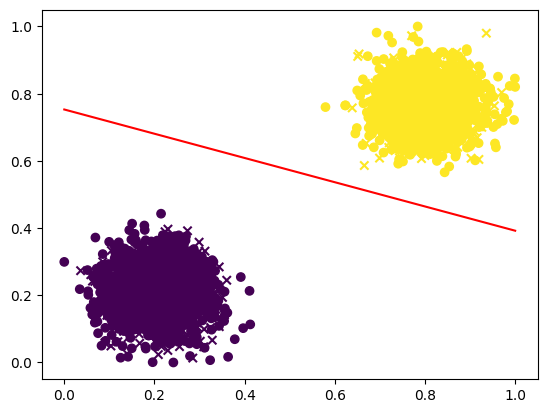

[ 0.06131533  0.16995571 -0.12796794]
Total error in training is: 0.0
accuracy: 100.0%
		True yes		True no
Predicted yes	1500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		1500 (100.0%)


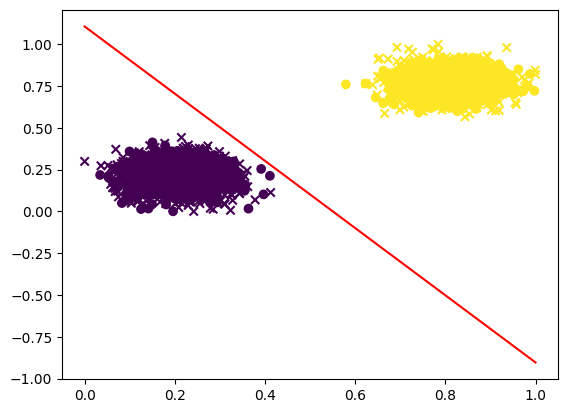

[ 0.38576079  0.1918509  -0.2123401 ]

GroupB
Total error in training is: 54.0
accuracy: 98.2%
		True yes		True no
Predicted yes	485 (99.39%)		3 (0.61%)
Predicted no	15 (2.93%)		497 (97.07%)


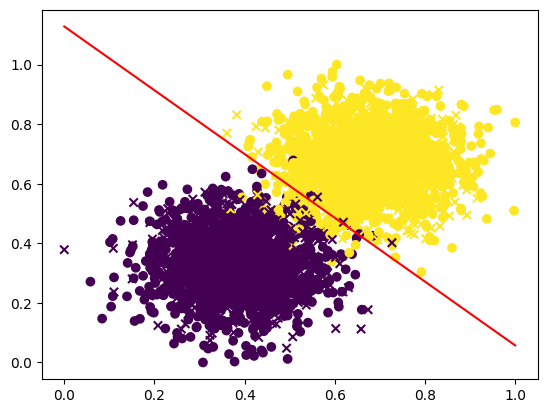

[ 1.00988946  0.94318328 -1.06394511]
Total error in training is: 29.0
accuracy: 96.43333333333334%
		True yes		True no
Predicted yes	1395 (99.86%)		2 (0.14%)
Predicted no	105 (6.55%)		1498 (93.45%)


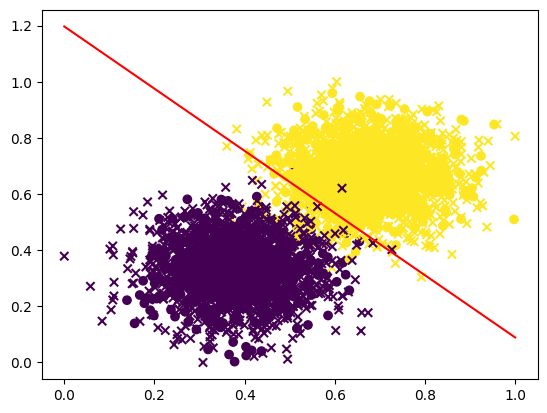

[ 0.6111873   0.55170913 -0.66035604]

GroupC
Total error in training is: 1121.0
accuracy: 63.2%
		True yes		True no
Predicted yes	159 (85.48%)		27 (14.52%)
Predicted no	341 (41.89%)		473 (58.11%)


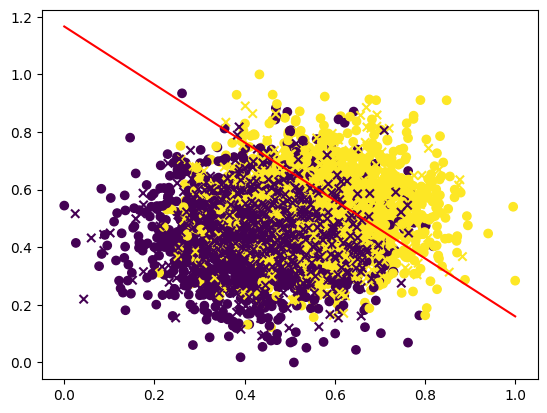

[ 0.36495348  0.36264243 -0.42299381]
Total error in training is: 328.0
accuracy: 68.96666666666667%
		True yes		True no
Predicted yes	744 (80.96%)		175 (19.04%)
Predicted no	756 (36.33%)		1325 (63.67%)


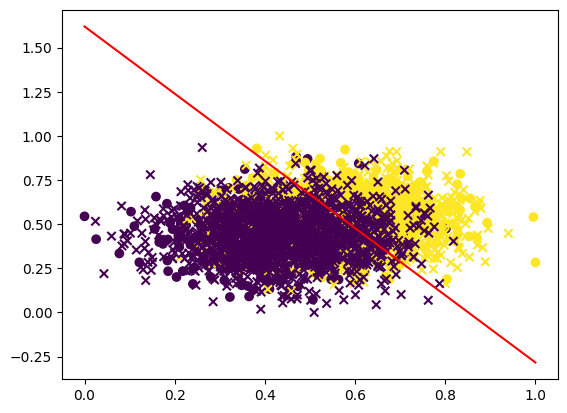

[ 0.3876736   0.20366269 -0.32995027]


In [68]:
# hard activation
print("HARD ACTIVATION")
print("---------------------------------------")
print("\nGroupA")
print(train(a, 3/4, 0.00001, 0.1, "hard"))
print(train(a, 1/4, 0.00001, 0.1, "hard"))

print("\nGroupB")
print(train(b, 3/4, 40, 0.1, "hard"))
print(train(b, 1/4, 40, 0.1, "hard"))

print("\nGroupC")
print(train(c, 3/4, 700, 0.1, "hard"))
print(train(c, 1/4, 700, 0.1, "hard"))

SOFT ACTIVATION
---------------------------------------

GroupA
Total error in training is: 1.0647522579766046e-05
accuracy: 100.0%
		True yes		True no
Predicted yes	500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		500 (100.0%)


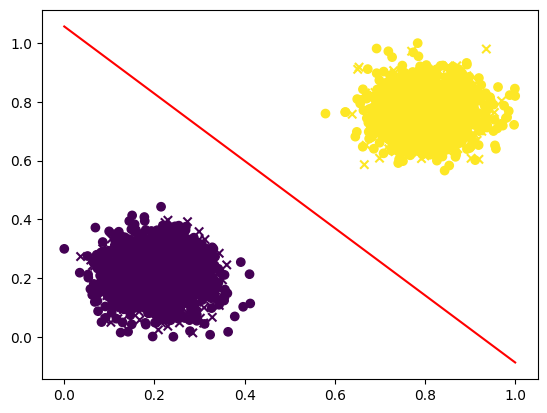

[ 46.0992159   40.28316312 -42.57008626]
Total error in training is: 2.6039344834953943e-05
accuracy: 100.0%
		True yes		True no
Predicted yes	1500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		1500 (100.0%)


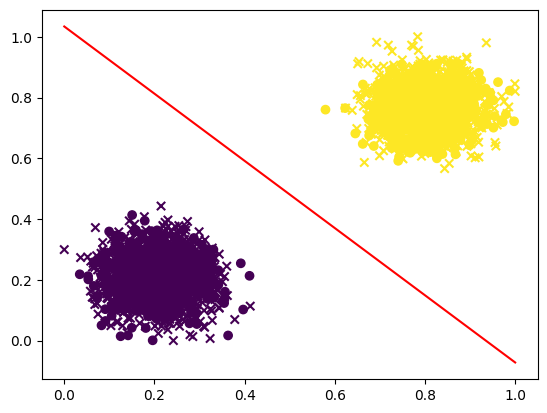

[ 40.81216165  36.90367633 -38.14998493]

GroupB
Total error in training is: 39.259664401171996
accuracy: 99.0%
		True yes		True no
Predicted yes	495 (99.0%)		5 (1.0%)
Predicted no	5 (1.0%)		495 (99.0%)


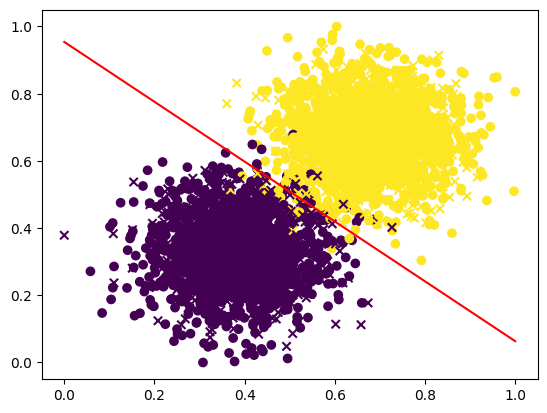

[ 24.27748287  27.25903378 -26.00557312]
Total error in training is: 35.46383075551896
accuracy: 98.7%
		True yes		True no
Predicted yes	1476 (98.99%)		15 (1.01%)
Predicted no	24 (1.59%)		1485 (98.41%)


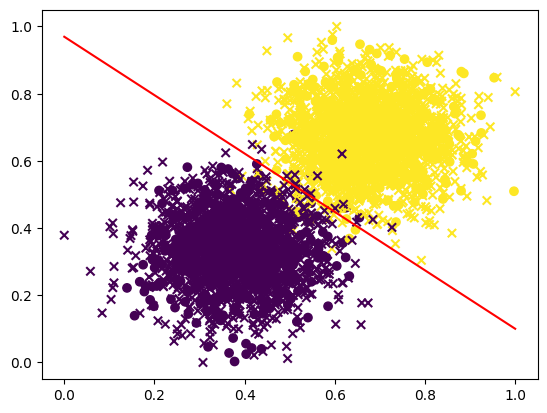

[ 11.90044064  13.69336052 -13.27506141]

GroupC
Total error in training is: 667.760629031373
accuracy: 71.2%
		True yes		True no
Predicted yes	357 (71.12%)		145 (28.88%)
Predicted no	143 (28.71%)		355 (71.29%)


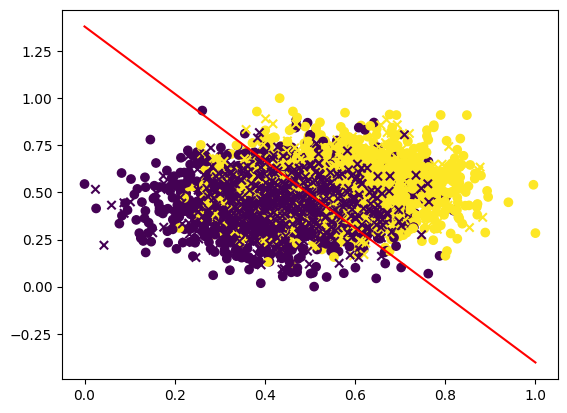

[ 5.58379106  3.13153127 -4.32342251]
Total error in training is: 235.57985316515666
accuracy: 55.63333333333333%
		True yes		True no
Predicted yes	189 (90.43%)		20 (9.57%)
Predicted no	1311 (46.97%)		1480 (53.03%)


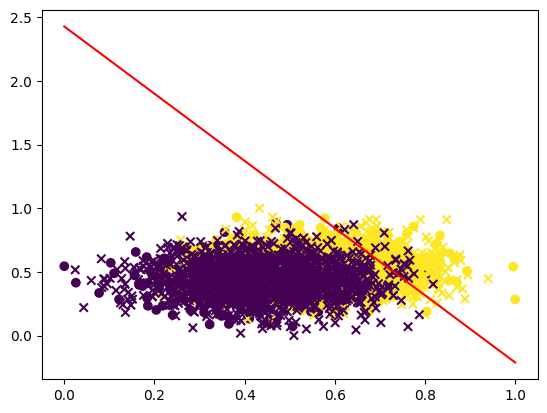

[ 2.43215881  0.92124952 -2.23699112]


In [69]:
#soft activation
print("SOFT ACTIVATION")
print("---------------------------------------")
print("\nGroupA")
print(train(a, 3/4, 0.00001, 0.1, "soft")) #75
print(train(a, 1/4, 0.00001, 0.1, "soft")) #25

print("\nGroupB")
print(train(b, 3/4, 40, 0.1, "soft"))#75
print(train(b, 1/4, 40, 0.1, "soft"))#25

print("\nGroupC")
print(train(c, 3/4, 700, 0.1, "soft"))#75
print(train(c, 1/4, 700, 0.1, "soft"))#25

# vt hacks
# umd hacks
# hacknc
# mlh major league hacks
# devpost